# Text-Guided Editing of Images (Using CLIP and StyleGAN)

In [ ]:
#@title Setup (may take a few minutes)
%%capture
!git clone https://github.com/orpatashnik/StyleCLIP.git

import os
os.chdir(f'./StyleCLIP')

!pip install ftfy regex tqdm
!pip install git+https://github.com/openai/CLIP.git
!gdown --id 1EM87UquaoQmk17Q8d5kYIAHqu0dkYqdT

In [1]:
experiment_type = 'edit' #@param ['edit', 'free_generation']

description = 'A person with purple hair' #@param

latent_path = None #@param

optimization_steps = 300 #@param {type:"number"}

l2_lambda = 0.008 #@param {type:"number"}

In [2]:
#@title Additional Arguments
args = {
    "description": description,
    "ckpt": "stylegan2-ffhq-config-f.pt",
    "size": 1024,
    "lr_rampup": 0.05,
    "lr": 0.1,
    "step": optimization_steps,
    "mode": experiment_type,
    "l2_lambda": l2_lambda,
    "latent_path": latent_path,
    "truncation": 0.7,
    "save_intermediate_image_every": 20,
    "results_dir": "results"
}

In [3]:
from main import main
from argparse import Namespace
result = main(Namespace(**args))

loss: 0.6875;: 100%|██████████| 300/300 [01:47<00:00,  2.78it/s]


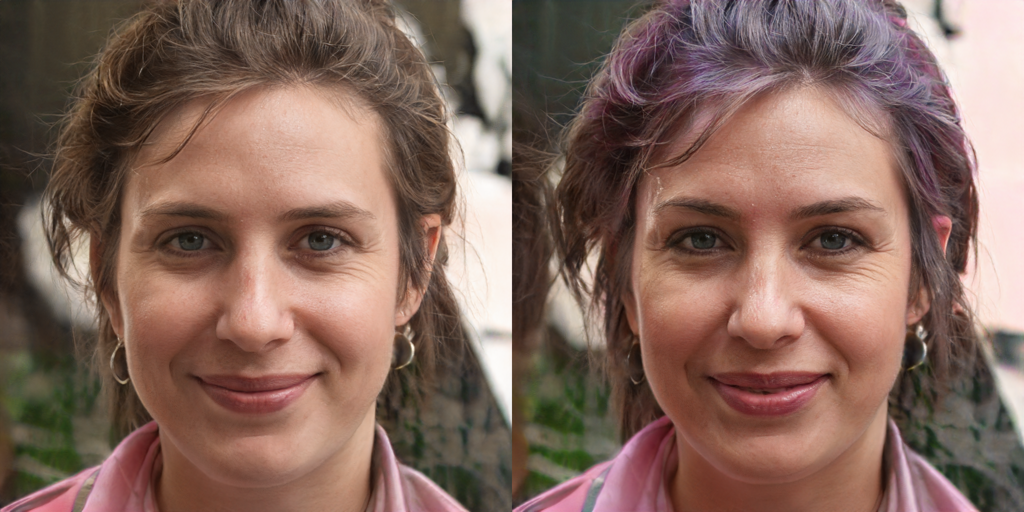

In [4]:
#@title Visualize Result
from torchvision.utils import make_grid
from torchvision.transforms import ToPILImage
result_image = ToPILImage()(make_grid(result.detach().cpu(), normalize=True, scale_each=True, range=(-1, 1), padding=0))
h, w = result_image.size
result_image.resize((h // 2, w // 2))